In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

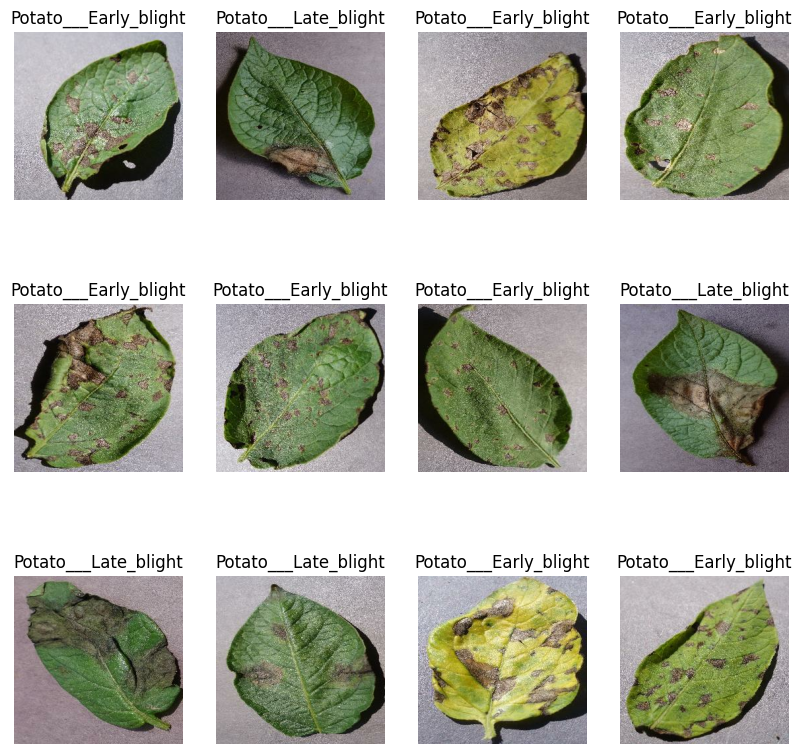

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
      ax = plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):

    ds_size = len(ds)

    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 269s 5s/step - loss: 0.8783 - accuracy: 0.4959 - val_loss: 0.7868 - val_accuracy: 0.5833
Epoch 2/50
54/54 [==============================] - 218s 4s/step - loss: 0.6608 - accuracy: 0.7031 - val_loss: 0.5286 - val_accuracy: 0.7552
Epoch 3/50
54/54 [==============================] - 212s 4s/step - loss: 0.5621 - accuracy: 0.7459 - val_loss: 0.4505 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 210s 4s/step - loss: 0.4441 - accuracy: 0.8027 - val_loss: 0.4070 - val_accuracy: 0.8021
Epoch 5/50
54/54 [==============================] - 213s 4s/step - loss: 0.3571 - accuracy: 0.8553 - val_loss: 0.3466 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 211s 4s/step - loss: 0.2192 - accuracy: 0.9144 - val_loss: 0.1987 - val_accuracy: 0.9115
Epoch 7/50
54/54 [==============================] - 220s 4s/step - loss: 0.1839 - accuracy: 0.9311 - val_loss: 0.0910 - val_accuracy: 0.9583
Epoch 8/50
54

In [26]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 6s 485ms/step - loss: 0.0945 - accuracy: 0.9648


In [27]:
scores

[0.09449971467256546, 0.96484375]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history['accuracy']

[0.49594905972480774,
 0.703125,
 0.7459490895271301,
 0.8026620149612427,
 0.8553240895271301,
 0.9143518805503845,
 0.9311342835426331,
 0.9502314925193787,
 0.9583333134651184,
 0.9577546119689941,
 0.9623842835426331,
 0.9733796119689941,
 0.9577546119689941,
 0.9438657164573669,
 0.9704861044883728,
 0.9809027910232544,
 0.9739583134651184,
 0.9722222089767456,
 0.9733796119689941,
 0.9728009104728699,
 0.9814814925193787,
 0.9693287014961243,
 0.9837962985038757,
 0.9785879850387573,
 0.9872685074806213,
 0.9768518805503845,
 0.9861111044883728,
 0.9814814925193787,
 0.9930555820465088,
 0.9942129850387573,
 0.9901620149612427,
 0.9855324029922485,
 0.9924768805503845,
 0.9814814925193787,
 0.9930555820465088,
 0.9884259104728699,
 0.9809027910232544,
 0.9722222089767456,
 0.9884259104728699,
 0.9878472089767456,
 0.984375,
 0.9814814925193787,
 0.9930555820465088,
 0.9936342835426331,
 0.9907407164573669,
 0.9953703880310059,
 0.9924768805503845,
 0.9866898059844971,
 0.99305558

In [32]:
len(history.history['accuracy'])

50

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

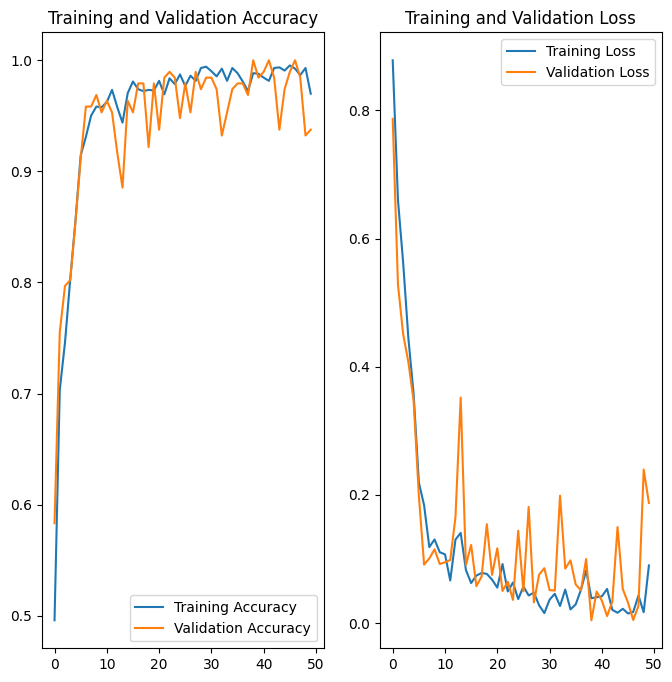

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch[0].numpy())

[[[162. 164. 177.]
  [175. 177. 190.]
  [183. 185. 198.]
  ...
  [137. 135. 149.]
  [ 88.  86. 100.]
  [208. 206. 220.]]

 [[174. 176. 189.]
  [174. 176. 189.]
  [171. 173. 186.]
  ...
  [ 90.  88. 102.]
  [115. 113. 127.]
  [122. 120. 134.]]

 [[163. 165. 178.]
  [166. 168. 181.]
  [173. 175. 188.]
  ...
  [ 85.  83.  97.]
  [104. 102. 116.]
  [ 88.  86. 100.]]

 ...

 [[137. 139. 152.]
  [133. 135. 148.]
  [138. 140. 153.]
  ...
  [118. 120. 132.]
  [123. 125. 137.]
  [120. 122. 134.]]

 [[144. 146. 159.]
  [136. 138. 151.]
  [138. 140. 153.]
  ...
  [ 96.  98. 110.]
  [108. 110. 122.]
  [ 80.  82.  94.]]

 [[146. 148. 161.]
  [136. 138. 151.]
  [134. 136. 149.]
  ...
  [127. 129. 141.]
  [104. 106. 118.]
  [120. 122. 134.]]]


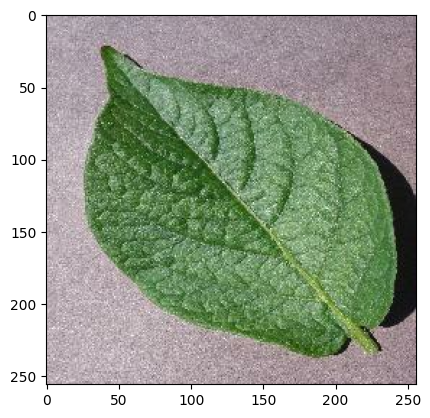

In [36]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

In [38]:
import numpy as np
np.argmax([1.05249404e-04, 9.99894142e-01, 5.55200586e-07])

1

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 1s 825ms/step
predicted label: Potato___healthy


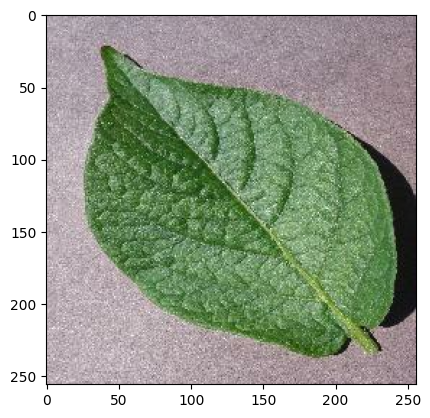

In [39]:

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [40]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


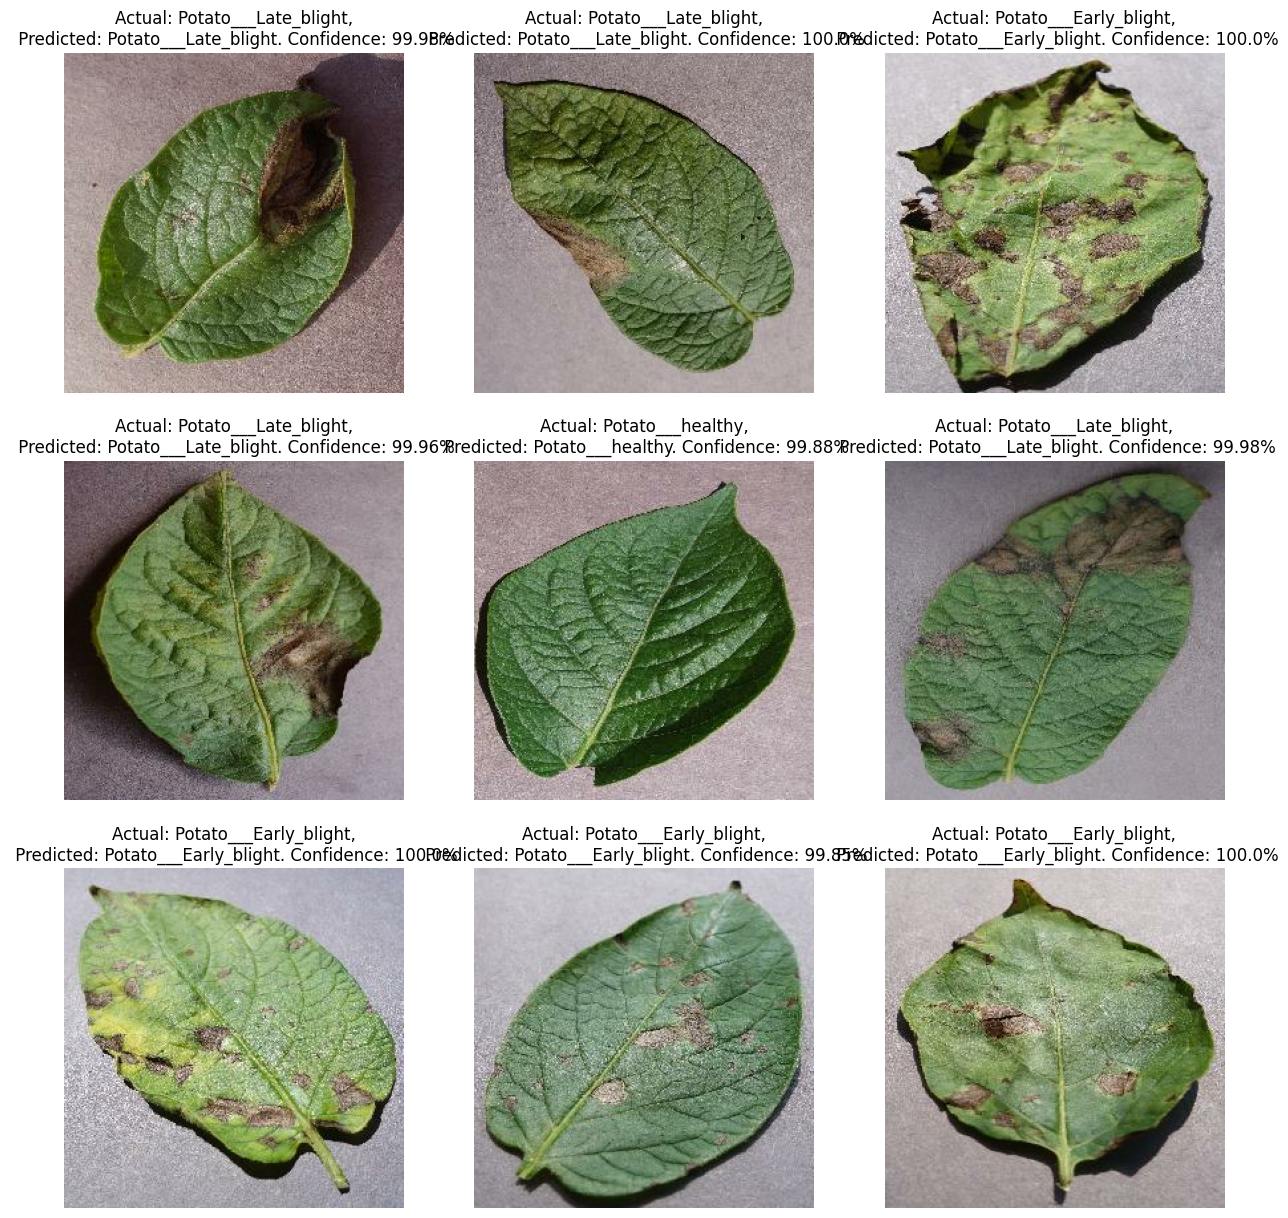

In [41]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}. Confidence: {confidence}%")
        
        plt.axis("off")

In [42]:
model_version=1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [43]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


In [44]:
# print evaluation scores for the CNN model
print("Test Loss:", scores[0])
print("Test Accuracy:", scores[1])

Test Loss: 0.09449971467256546
Test Accuracy: 0.96484375
